<a href="https://colab.research.google.com/github/manvendra-07/DL-Lab/blob/main/Week%207/200968146_DL_Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing the required libraries**

In [1]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

- **Importing the required preprocessing libraries**

In [2]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## **Importing the dataset**

In [3]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
valid = pd.read_csv("Valid.csv")
train.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


## **Preprocessing Steps**


- **Using the Regular Expression (re) library, replace html tags with whitespaces and remove stopwords**

In [19]:
stop_words = ["br"] + list(set(stopwords.words('english')))

def preprocess(text):
    text = re.sub(r'[^\w\s]', '', text)                                          
    text = re.sub(r'http\S+', '', text)                                           
    text = text.lower()                                                           
    text = [w for w in text.split(' ') if w not in stop_words]                     
    text = " ".join(text)
    return text

In [20]:
train['text'] = train.text.apply(lambda x: preprocess(x))
test['text'] = test.text.apply(lambda x: preprocess(x))
valid['text'] = valid.text.apply(lambda x: preprocess(x))

- **Applying lemmatization to the input**

In [21]:
train['text'] = train.text.apply(lambda x: WordNetLemmatizer().lemmatize(x))
valid['text'] = valid.text.apply(lambda x: WordNetLemmatizer().lemmatize(x))
test['text'] = test.text.apply(lambda x: WordNetLemmatizer().lemmatize(x))

In [22]:
train['text'].head()

0    grew b 1965 watching loving thunderbirds mates...
1    put movie dvd player sat coke chips expectatio...
2    people know particular time past like feel nee...
3    even though great interest biblical movies bor...
4    im die hard dads army fan nothing ever change ...
Name: text, dtype: object

- **Function for visualising train loss**

In [23]:
def visualise_train(history):
  sns.set_style("darkgrid")
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)



  #Train and validation loss
  plt.figure()
  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.xlabel('Epoch #')
  plt.ylabel('loss')
  plt.title('Training and Validation loss')
  plt.legend()

  plt.show()

- **Word Cloud of most frequent words**

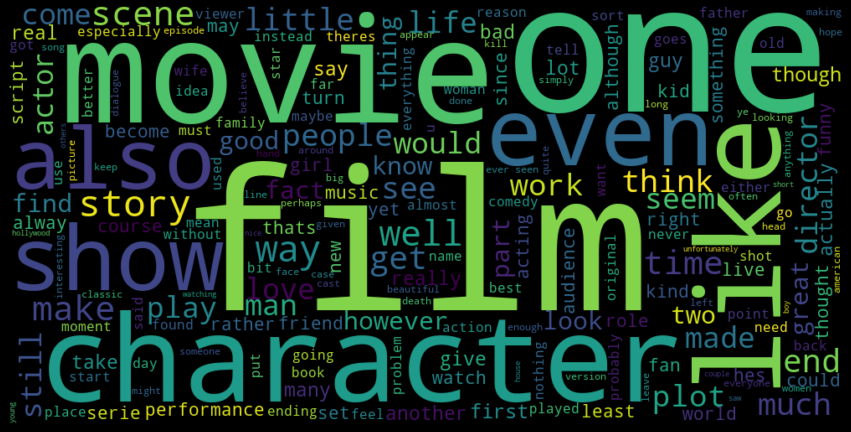

In [24]:
text = " ".join(i for i in train['text'])
wordcloud = WordCloud(stopwords=stop_words, width=1000, height=500).generate(text)
plt.figure(figsize=(15,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- **Bigrams of most frequent words**

In [25]:
words = train['text'].tolist()

tokenized = [word_tokenize(i) for i in words]
flat_list = [num for sublist in tokenized for num in sublist]

bigram_df = pd.DataFrame(pd.Series(nltk.ngrams(flat_list, 2)).value_counts()).rename_axis('bigram').reset_index('bigram')
bigram_df.columns = ['bigram', 'count']
bigram_df['bigram'] = bigram_df['bigram'].astype("string")
bigram_df.head(10)

,bigram,count
0,"('ever', 'seen')",2033
1,"('ive', 'seen')",1783
2,"('special', 'effects')",1715
3,"('can', 'not')",1657
4,"('dont', 'know')",1633
5,"('even', 'though')",1560
6,"('one', 'best')",1485
7,"('looks', 'like')",1319
8,"('much', 'better')",1143
9,"('see', 'movie')",1139


- **Word Cloud of positive sentiments**

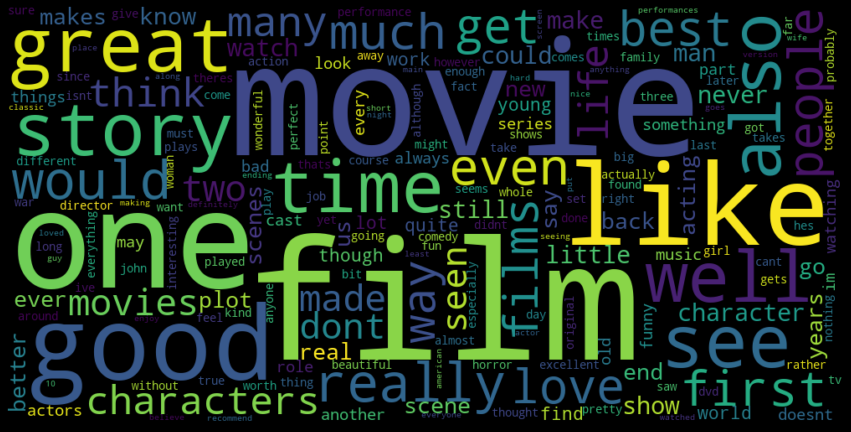

In [26]:
pos_freq = FreqDist(' '.join(train[train['label'] == 1].text).split(' '))
wordcloud = WordCloud(stopwords=stop_words, width=1000, height=500).generate_from_frequencies(pos_freq)
plt.figure(figsize=(15,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- **Word Cloud of negative sentiments**

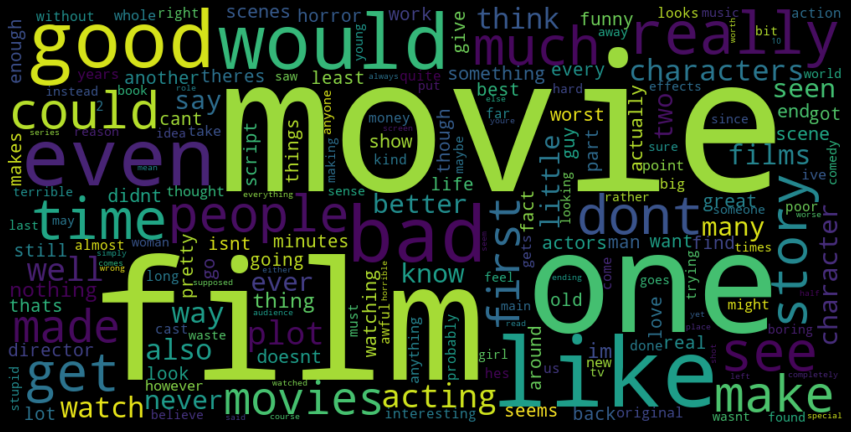

In [27]:
neg_freq = FreqDist(' '.join(train[train['label'] == 0].text).split(' '))
wordcloud = WordCloud(stopwords=stop_words, width=1000, height=500).generate_from_frequencies(frequencies=neg_freq)
plt.figure(figsize=(15,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- **Splitting the data into X and Y sets**

In [28]:
X_train, X_test, X_valid = train['text'], test['text'], valid['text']
Y_train, Y_test, Y_valid = train['label'], test['label'], valid['label']

| **Peroforming Tokenization**

In [29]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer()

tokenizer.fit_on_texts(X_train)


X_train = tokenizer.texts_to_sequences(X_train)
X_valid = tokenizer.texts_to_sequences(X_valid)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = pad_sequences(X_train, maxlen=120)
X_valid = pad_sequences(X_valid, maxlen=120)
X_test = pad_sequences(X_test, maxlen=120)

In [30]:
size_of_vocabulary = len(tokenizer.word_index)+1
print(size_of_vocabulary)

160300


## **LSTM Model**

In [31]:
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Embedding, Dropout

def LSTM_Model():
  model = tf.keras.Sequential([
      Embedding(size_of_vocabulary, 128, input_length = 120),
      LSTM(15, return_sequences=True),
      Dropout(0.2),
      Dense(1, activation='sigmoid')
  ])
  model.summary()
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model

In [32]:
lstm = LSTM_Model()
lstm_history = lstm.fit(X_train, Y_train, batch_size = 128, epochs = 4,validation_data = (X_valid, Y_valid), verbose = 1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 128)          20518400  
                                                                 
 lstm_1 (LSTM)               (None, 120, 15)           8640      
                                                                 
 dropout_1 (Dropout)         (None, 120, 15)           0         
                                                                 
 dense_1 (Dense)             (None, 120, 1)            16        
                                                                 
Total params: 20,527,056
Trainable params: 20,527,056
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
313/313 [==============================] - 14s 20ms/step - loss: 0.5436 - accuracy: 0.6978 - val_loss: 0.5074 - val_accuracy: 0.7136
Epoch 2/4
313/313 [============

- **Visaulising the Train Loss**

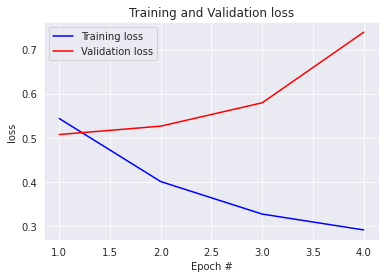

In [33]:
visualise_train(lstm_history)

- **Testing the LSTM model**

In [34]:
lstm_test = lstm.evaluate(X_test, Y_test)

157/157 [==============================] - 1s 4ms/step - loss: 0.7077 - accuracy: 0.7115


## **Bi-Directional RNN Model**

In [35]:
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Embedding, Dropout, Bidirectional

def RNN_Model():
  model = tf.keras.Sequential([
      Embedding(size_of_vocabulary,128,input_length=120),
      Bidirectional(SimpleRNN(20, return_sequences= True)),
      Dropout(0.3),
      Dense(1, activation='sigmoid')
  ])

  model.summary()
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model

In [36]:
rnn = RNN_Model()
rnn_history = rnn.fit(X_train, Y_train, batch_size = 128, epochs = 4, validation_data = (X_valid, Y_valid), verbose = 1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 128)          20518400  
                                                                 
 bidirectional (Bidirectiona  (None, 120, 40)          5960      
 l)                                                              
                                                                 
 dropout_2 (Dropout)         (None, 120, 40)           0         
                                                                 
 dense_2 (Dense)             (None, 120, 1)            41        
                                                                 
Total params: 20,524,401
Trainable params: 20,524,401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
313/313 [==============================] - 70s 218ms/step - loss: 0.4269 - accuracy: 0.8148 - val_

- **Visualising the Train Loss**

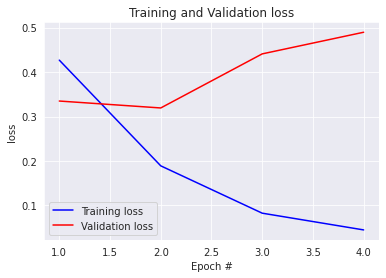

In [37]:
visualise_train(rnn_history)

- **Testing the BiRNN Model**

In [38]:
rnn_test = rnn.evaluate(X_test, Y_test)

157/157 [==============================] - 5s 29ms/step - loss: 0.4785 - accuracy: 0.8721


## **Comparing the two models**

In [41]:
from tabulate import tabulate
table = [['Model', 'Train Loss', 'Train Accuracy', 'Test Loss', 'Test Accuracy'],
         ['LSTM', lstm_history.history['loss'][-1], lstm_history.history['accuracy'][-1], lstm_test[0], lstm_test[1]],
         ['BidRNN', rnn_history.history['loss'][-1], rnn_history.history['accuracy'][-1], rnn_test[0], rnn_test[1]]]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════╤══════════════╤══════════════════╤═════════════╤═════════════════╕
│ Model   │   Train Loss │   Train Accuracy │   Test Loss │   Test Accuracy │
╞═════════╪══════════════╪══════════════════╪═════════════╪═════════════════╡
│ LSTM    │    0.291274  │         0.823406 │    0.707719 │        0.71145  │
├─────────┼──────────────┼──────────────────┼─────────────┼─────────────────┤
│ BidRNN  │    0.0448201 │         0.987384 │    0.478538 │        0.872068 │
╘═════════╧══════════════╧══════════════════╧═════════════╧═════════════════╛


## **Creating my own dataset for testing**

In [43]:
myTest = pd.read_csv('myData.csv')
myTest.head(10)

,text,label
0,the movie was outstanding the performance of t...,1
1,the movie could've been far better had the dir...,0
2,movie was a waste of time what an awful experi...,0
3,why did i pay 300 bucks for this very bad movie,0
4,the movie is great if you have the stomach for...,1
5,movie was ok although the cinematography was good,1
6,how are people liking this movie it was absolu...,0
7,great movie in my opinion don't care about others,1
8,amazing movie must watch,1
9,i feel this movie would have been able to capt...,0


- **Applying required preprocessing**

In [44]:
X_myTest = myTest['text']
Y_myTest = myTest['label']

X_myTest = X_myTest.apply(lambda x: preprocess(x))
X_myTest = X_myTest.apply(lambda x: WordNetLemmatizer().lemmatize(x))

X_myTest = tokenizer.texts_to_sequences(X_myTest)
X_myTest = pad_sequences(X_myTest, maxlen=120)

- **Testing LSTM Model on my custom dataset**

In [45]:
mytest_lstm = lstm.evaluate(X_myTest, Y_myTest)

1/1 [==============================] - 0s 23ms/step - loss: 0.6925 - accuracy: 0.5050


- **Testing Bi-RNN Model on my custom dataset**

In [46]:
mytest_rnn = rnn.evaluate(X_myTest, Y_myTest)

1/1 [==============================] - 0s 36ms/step - loss: 0.5817 - accuracy: 0.8267


## **Observations :**

- The dataset being a text sequence is really large which makes use of GPU power for training and different preprocessing steps.

- The LSTM Model trains faster as compared to the Bi-Directional RNN model but the Bid-RNN Model is better able to capture the context of the sequence.

- In this case the BidRNN performs better than the LSTM model but there is the computation and time costs involved.

- Hence, going for a Bid-LSTM Model can also be a good option to experiment, which is done in the following code.


## **Creating BidLSTM Model for experimentation**

In [47]:
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Embedding, Dropout, Bidirectional

def BiLSTM_Model():
  model = tf.keras.Sequential([
      Embedding(size_of_vocabulary,128,input_length=120),
      Bidirectional(LSTM(20, return_sequences= True)),
      Dropout(0.3),
      Dense(1, activation='sigmoid')
  ])

  model.summary()
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model

In [48]:
bilstm = BiLSTM_Model()
bilstm_history = bilstm.fit(X_train, Y_train, batch_size = 128, epochs = 4, validation_data = (X_valid, Y_valid), verbose = 1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 128)          20518400  
                                                                 
 bidirectional_1 (Bidirectio  (None, 120, 40)          23840     
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 120, 40)           0         
                                                                 
 dense_3 (Dense)             (None, 120, 1)            41        
                                                                 
Total params: 20,542,281
Trainable params: 20,542,281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
313/313 [==============================] - 11s 26ms/step - loss: 0.4002 - accuracy: 0.8269 - val_l

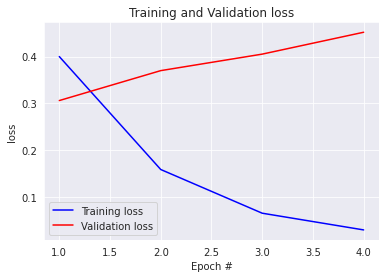

In [49]:
visualise_train(bilstm_history)

In [50]:
bilstm_test = bilstm.evaluate(X_test, Y_test)

157/157 [==============================] - 1s 7ms/step - loss: 0.4330 - accuracy: 0.8826


- **Testing the BidLSTM Model on my data**

In [56]:
print(f"Accuracy = {bilstm.evaluate(X_myTest, Y_myTest)[1]}")

1/1 [==============================] - 0s 25ms/step - loss: 0.3799 - accuracy: 0.8908
Accuracy = 0.8908332586288452


| **As expected the Bid-LSTM model blows the other models out of water in terms of speed and performance**

- **The model trains in almost no time as compared to the Bid-RNN**

- **With the use of BidLSTM we can capture the context better with much faster speeds and better memory which is inherent to LSTMs**

- **This model also gives us the best training loss**

- **Therefore, going for a BidLSTM model would just make the task *much* easier and faster**

## **Tabulation of all the models provided below for reference**

In [53]:
from tabulate import tabulate
table = [['Model', 'Train Loss', 'Train Accuracy', 'Test Loss', 'Test Accuracy'],
         ['LSTM', lstm_history.history['loss'][-1], lstm_history.history['accuracy'][-1], lstm_test[0], lstm_test[1]],
         ['BidRNN', rnn_history.history['loss'][-1], rnn_history.history['accuracy'][-1], rnn_test[0], rnn_test[1]],
         ['BidLSTM', bilstm_history.history['loss'][-1], bilstm_history.history['accuracy'][-1], bilstm_test[0], bilstm_test[1]]]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════╤══════════════╤══════════════════╤═════════════╤═════════════════╕
│ Model   │   Train Loss │   Train Accuracy │   Test Loss │   Test Accuracy │
╞═════════╪══════════════╪══════════════════╪═════════════╪═════════════════╡
│ LSTM    │    0.291274  │         0.823406 │    0.707719 │        0.71145  │
├─────────┼──────────────┼──────────────────┼─────────────┼─────────────────┤
│ BidRNN  │    0.0448201 │         0.987384 │    0.478538 │        0.872068 │
├─────────┼──────────────┼──────────────────┼─────────────┼─────────────────┤
│ BidLSTM │    0.0288309 │         0.993098 │    0.433028 │        0.882612 │
╘═════════╧══════════════╧══════════════════╧═════════════╧═════════════════╛
